# 프로젝트 목적
- 특정 인물의 사진을 입력받았을 때, 이 인물이 ***카카오프렌즈 캐릭터 중 누구를 닮았는지 예측***하고자 합니다.


# 프로젝트 계획
- 카카오 API를 활용하여 검색하여 이미지 수집을 할 예정입니다.

1. 사진 수집
  - '네오', '라이언', '무지', '어피치', '제이지', '춘식이', '튜브', '프로도'  캐릭터 이미지 수집하기


2. 저장한 이미지 데이터 중 필요없는 데이터를 일일이 골라내기.


3. Augmentation 데이터 증강하기
  - ImageDataGenerator 사용


4. 직접 모델링, 전이학습으로 모델링 2가지 방법 으로 모델링해보기
  - 직접 모델링 : CNN모델 직접 만들어보기
  - 전이 학습   : 이미 구현된 모델 전이학습으로 사용해보기


5. 본인 사진을 만든 모델에 넣어서 무엇과 닮았는지 예측...
  - predict. 할 때는 ImageDataGenerator의 flow() 활용

# 카카오 API 사용 메뉴얼

```python
  GET /v2/search/image HTTP/1.1
  Host: dapi.kakao.com
  Authorization: KakaoAK ${REST_API_KEY}
```

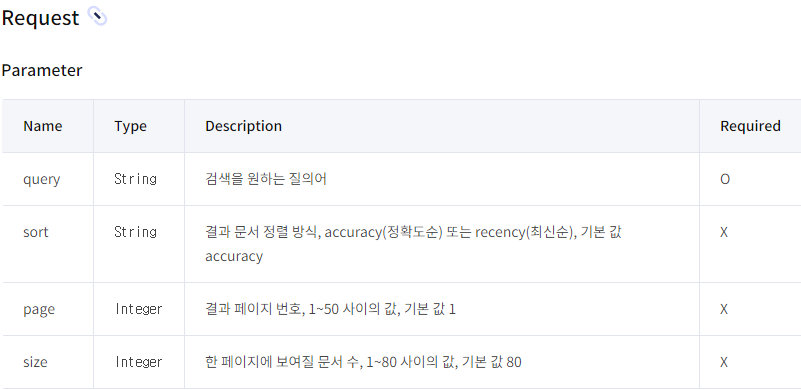

- 위의 Request Parameter를 바탕으로 아래의 함수 작성
  - 캐릭터 당 80개씩 10페이지(총 800개)씩을 목표로 함
    - page : 10
    - size : 80

# 0. 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. 사진수집
- 카카오 API이용

In [2]:
# 먼저 1개만 검색해서 실험해보기(이미지 경로 찾기 위해)
import requests

KAKAO_API_KEY = '개인 API KEY'
KAKAO_IMAGE_SEARCH_URL = "https://dapi.kakao.com/v2/search/image"

headers = {'Authorization': f'KakaoAK {KAKAO_API_KEY}'}

data = {'query' : "카카오프렌즈 라이언"}

response = requests.get(KAKAO_IMAGE_SEARCH_URL,
                              headers=headers,
                              data=data)

datas = response.json()
datas

{'documents': [{'collection': 'blog',
   'datetime': '2016-06-29T17:00:00.000+09:00',
   'display_sitename': '네이버블로그',
   'doc_url': 'http://blog.naver.com/rmfotj75411/220749042195',
   'height': 582,
   'image_url': 'https://postfiles.pstatic.net/20160629_274/rmfotj75411_14671796988302hBgg_JPEG/3.jpg?type=w1',
   'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/EMIzSRjoqJq',
   'width': 584},
  {'collection': 'blog',
   'datetime': '2018-02-06T14:35:00.000+09:00',
   'display_sitename': '네이버블로그',
   'doc_url': 'http://blog.naver.com/3dupndown/221202416808',
   'height': 229,
   'image_url': 'https://postfiles.pstatic.net/MjAxODAyMDZfMTkw/MDAxNTE3ODk0MjIxMTMw.Le8S20eo_8euHZeK2VQgSxWaW5t5eBesxvt6AFPTeIsg.RTM5BEvAnz6N5Ls6NoXX3qrfVMu3cejQ3gV8SP2k8pUg.PNG.3dupndown/2017771531229135.png?type=w966',
   'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/ErpEg8tCvt4',
   'width': 258},
  {'collection': 'blog',
   'datetime': '2017-12-06T12:03:00.000+09:00',
   '

In [3]:
datas['documents']

[{'collection': 'blog',
  'datetime': '2016-06-29T17:00:00.000+09:00',
  'display_sitename': '네이버블로그',
  'doc_url': 'http://blog.naver.com/rmfotj75411/220749042195',
  'height': 582,
  'image_url': 'https://postfiles.pstatic.net/20160629_274/rmfotj75411_14671796988302hBgg_JPEG/3.jpg?type=w1',
  'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/EMIzSRjoqJq',
  'width': 584},
 {'collection': 'blog',
  'datetime': '2018-02-06T14:35:00.000+09:00',
  'display_sitename': '네이버블로그',
  'doc_url': 'http://blog.naver.com/3dupndown/221202416808',
  'height': 229,
  'image_url': 'https://postfiles.pstatic.net/MjAxODAyMDZfMTkw/MDAxNTE3ODk0MjIxMTMw.Le8S20eo_8euHZeK2VQgSxWaW5t5eBesxvt6AFPTeIsg.RTM5BEvAnz6N5Ls6NoXX3qrfVMu3cejQ3gV8SP2k8pUg.PNG.3dupndown/2017771531229135.png?type=w966',
  'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/ErpEg8tCvt4',
  'width': 258},
 {'collection': 'blog',
  'datetime': '2017-12-06T12:03:00.000+09:00',
  'display_sitename': '네이버블로그',
  '

In [5]:
datas['documents'][0]

{'collection': 'blog',
 'datetime': '2016-06-29T17:00:00.000+09:00',
 'display_sitename': '네이버블로그',
 'doc_url': 'http://blog.naver.com/rmfotj75411/220749042195',
 'height': 582,
 'image_url': 'https://postfiles.pstatic.net/20160629_274/rmfotj75411_14671796988302hBgg_JPEG/3.jpg?type=w1',
 'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/EMIzSRjoqJq',
 'width': 584}

In [7]:
datas['documents'][0]['image_url']

'https://postfiles.pstatic.net/20160629_274/rmfotj75411_14671796988302hBgg_JPEG/3.jpg?type=w1'

이미지의 url을 뽑는 식을 알아냈습니다.

In [2]:
import requests
from urllib.request import urlretrieve

def image_save_train(character, english_name):
  KAKAO_API_KEY = '90f226e05d1cb0ee1fbaed30faceecbe'
  KAKAO_IMAGE_SEARCH_URL = "https://dapi.kakao.com/v2/search/image"

  headers = { 'Authorization': f'KakaoAK {KAKAO_API_KEY}'  }
  
  for p in range(1,11,1): # 1~10 페이지 가져오기
    data = {'query' : "카카오프렌즈"+character+"사진",
          'page' : p,
          'size' : 80}

    response = requests.get(  KAKAO_IMAGE_SEARCH_URL,  headers=headers , data=data )

    datas = response.json()


    for i in range(80): 
      try:
        count = "{} 페이지 {}번째".format(p, i+1)
        img_url = datas['documents'][i]['image_url']
        urlretrieve(img_url, '/content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑/project_data/train/{}_train/'.format(english_name) + count)

      except:
        print("{} 페이지 {}번째".format(p, i+1),"에서 오류가 났습니다")

못가져오거나 오류가 나는 이미지들이 있어서 예외처리를 해주었습니다!

In [3]:
image_save_train("네오", 'neo')

3 페이지 9번째 에서 오류가 났습니다
4 페이지 64번째 에서 오류가 났습니다
10 페이지 20번째 에서 오류가 났습니다


In [4]:
image_save_train("라이언", "lion")

4 페이지 72번째 에서 오류가 났습니다
9 페이지 40번째 에서 오류가 났습니다


In [5]:
image_save_train("무지", "muzi")

6 페이지 33번째 에서 오류가 났습니다
9 페이지 76번째 에서 오류가 났습니다
10 페이지 49번째 에서 오류가 났습니다


In [6]:
image_save_train("어피치", "peach")

1 페이지 2번째 에서 오류가 났습니다
1 페이지 20번째 에서 오류가 났습니다
4 페이지 51번째 에서 오류가 났습니다
4 페이지 66번째 에서 오류가 났습니다
5 페이지 3번째 에서 오류가 났습니다
5 페이지 4번째 에서 오류가 났습니다
5 페이지 9번째 에서 오류가 났습니다
5 페이지 24번째 에서 오류가 났습니다
8 페이지 70번째 에서 오류가 났습니다
9 페이지 74번째 에서 오류가 났습니다
10 페이지 25번째 에서 오류가 났습니다


In [7]:
image_save_train("제이지", "jg")

1 페이지 72번째 에서 오류가 났습니다
5 페이지 31번째 에서 오류가 났습니다
6 페이지 25번째 에서 오류가 났습니다
6 페이지 48번째 에서 오류가 났습니다
7 페이지 8번째 에서 오류가 났습니다
9 페이지 69번째 에서 오류가 났습니다
10 페이지 17번째 에서 오류가 났습니다


In [8]:
image_save_train("춘식이", "chun")

1 페이지 25번째 에서 오류가 났습니다
2 페이지 40번째 에서 오류가 났습니다
3 페이지 26번째 에서 오류가 났습니다
4 페이지 58번째 에서 오류가 났습니다
6 페이지 48번째 에서 오류가 났습니다
6 페이지 52번째 에서 오류가 났습니다


In [9]:
image_save_train("튜브", "tube")

3 페이지 6번째 에서 오류가 났습니다
6 페이지 41번째 에서 오류가 났습니다
9 페이지 19번째 에서 오류가 났습니다
9 페이지 58번째 에서 오류가 났습니다


In [10]:
image_save_train("프로도", "frodo")

2 페이지 45번째 에서 오류가 났습니다
3 페이지 52번째 에서 오류가 났습니다
3 페이지 62번째 에서 오류가 났습니다
8 페이지 35번째 에서 오류가 났습니다


# Test 데이터 수집

In [11]:
import requests
from urllib.request import urlretrieve

def image_save_test(character, english_name):
  KAKAO_API_KEY = '90f226e05d1cb0ee1fbaed30faceecbe'
  KAKAO_IMAGE_SEARCH_URL = "https://dapi.kakao.com/v2/search/image"

  headers = { 'Authorization': f'KakaoAK {KAKAO_API_KEY}'  }
  
  for p in range(11,16,1): # 11~15 페이지 가져오기
    data = {'query' : "카카오프렌즈"+character+"사진",
          'page' : p,
          'size' : 80}

    response = requests.get(  KAKAO_IMAGE_SEARCH_URL,  headers=headers , data=data )

    datas = response.json()


    for i in range(80): 
      try:
        count = "{} 페이지 {}번째".format(p, i+1)
        img_url = datas['documents'][i]['image_url']
        urlretrieve(img_url, '/content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑/project_data/test/{}_test/'.format(english_name) + count)

      except:
        print("{} 페이지 {}번째".format(p, i+1),"에서 오류가 났습니다")
        

In [12]:
image_save_test("네오", "neo")

15 페이지 44번째 에서 오류가 났습니다
15 페이지 58번째 에서 오류가 났습니다


In [13]:
image_save_test("라이언", "lion")

12 페이지 26번째 에서 오류가 났습니다
15 페이지 63번째 에서 오류가 났습니다


In [14]:
image_save_test("무지", "muzi")

11 페이지 25번째 에서 오류가 났습니다
12 페이지 1번째 에서 오류가 났습니다
13 페이지 77번째 에서 오류가 났습니다
15 페이지 7번째 에서 오류가 났습니다


In [15]:
image_save_test("어피치", "peach")

15 페이지 8번째 에서 오류가 났습니다
15 페이지 20번째 에서 오류가 났습니다
15 페이지 46번째 에서 오류가 났습니다
15 페이지 55번째 에서 오류가 났습니다


In [16]:
image_save_test("제이지", "jg")

12 페이지 46번째 에서 오류가 났습니다
13 페이지 6번째 에서 오류가 났습니다
14 페이지 40번째 에서 오류가 났습니다
15 페이지 2번째 에서 오류가 났습니다


In [17]:
image_save_test("춘식이", "chun")

In [18]:
image_save_test("튜브", "tube")

11 페이지 15번째 에서 오류가 났습니다
13 페이지 51번째 에서 오류가 났습니다
15 페이지 42번째 에서 오류가 났습니다
15 페이지 79번째 에서 오류가 났습니다


In [19]:
image_save_test("프로도", "frodo")

# 혹시 조원의 솎아낸 데이터를 ZIP파일로 불러와야하는경우

In [ ]:
# 현재위치경로 확인
%pwd

'/content'

In [ ]:
# 위치경로 이동하기
%cd /content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑

/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑


In [ ]:
%pwd

'/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑'

In [ ]:
# 개인의 경로에 맞게 풀어주어야 합니다.
!unzip "압축풀파일위치경로" -d "압출풀위치경로"

# 몇 개의 사진 파일이 받아졌는지 계산
- os.listdir이용
  - 지정한 경로에있는 파일들의 이름을 전부 가져와준다

In [26]:
path = '/content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑/project_data/train/neo_train'
lst = os.listdir(path)

lst[:5]

['1 페이지 1번째',
 '1 페이지 2번째',
 '1 페이지 3번째',
 '1 페이지 4번째',
 '1 페이지 5번째']

In [22]:
import os

lst = ['neo', 'lion', 'muzi', 'peach', 'jg', 'chun', 'tube', 'frodo']

for name in lst:
  # user마다 디렉토리 경로가 다르기 때문에 사용 시 주의 요망
  path = '/content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑/project_data/train/{}_train'.format(name)
  lst = os.listdir(path)
  print(name, '의 사진 다운로드 개수 :', len(lst))

neo 의 사진 다운로드 개수 : 797
lion 의 사진 다운로드 개수 : 798
muzi 의 사진 다운로드 개수 : 797
peach 의 사진 다운로드 개수 : 789
jg 의 사진 다운로드 개수 : 793
chun 의 사진 다운로드 개수 : 794
tube 의 사진 다운로드 개수 : 796
frodo 의 사진 다운로드 개수 : 796


In [20]:
import os

lst = ['neo', 'lion', 'muzi', 'peach', 'jg', 'chun', 'tube', 'frodo']

for name in lst:
  # user마다 디렉토리 경로가 다르기 때문에 사용 시 주의 요망
  path = '/content/drive/MyDrive/멀티캠퍼스9회차I반/스크래이핑/project_data/test/{}_test'.format(name)
  lst = os.listdir(path)
  print(name, '의 사진 다운로드 개수 :', len(lst))

neo 의 사진 다운로드 개수 : 398
lion 의 사진 다운로드 개수 : 398
muzi 의 사진 다운로드 개수 : 396
peach 의 사진 다운로드 개수 : 396
jg 의 사진 다운로드 개수 : 396
chun 의 사진 다운로드 개수 : 400
tube 의 사진 다운로드 개수 : 396
frodo 의 사진 다운로드 개수 : 400


# 2. 이미지 솎아내기

- 아래의 조건을 기준으로 각 폴더의 사진을 필터링하였다.
  1. 해당 캐릭터가 전혀 없는 사진
    - 카카오프렌즈 소속 다른 캐릭터의 독사진인 경우 해당 캐릭터 폴더로 이동해주었다.
  2. 해당 캐릭터와 다른 캐릭터가 포함된 사진
    - 한 캐릭터가 독보적인 경우는 포함
    - 그렇지 않은 경우 협의를 거쳐 포함 여부 결정
  3. 사진이 아닌 다른 확장자의 파일이 혼입된 경우
    - *.gif는 사진의 연속이므로 우선 포함
      - 차후 문제가 생길경우 배제

## 조원끼리 일일이 수행하여 가장 시간이 많이 걸렸던 단계인것 같다..!

# 3. ImageDataGenerator Augmentation

## 사진 1장을 예시로 test

In [ ]:
import os

for dirname, _, filenames in os.walk("/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data"): # 경로, 폴더, 파일
  for filename in filenames[:3]:
    print(os.path.join(dirname,filename))

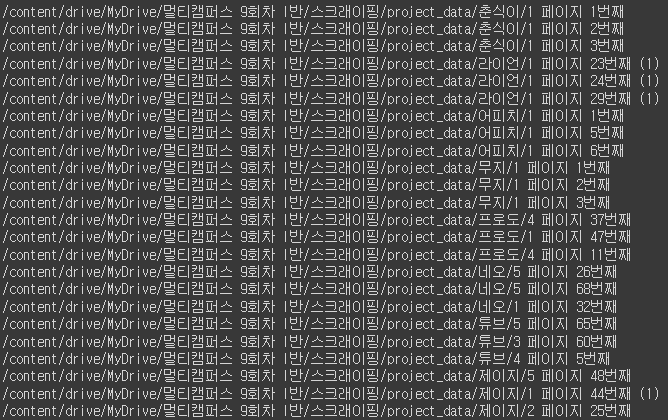

In [ ]:
X = []
for dirname, _, filenames in os.walk("/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data"): # 경로, 폴더, 파일
  for filename in filenames:
    X.append(os.path.join(dirname,filename))

X[-5:]

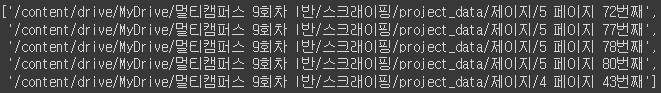

- 슬래시(/)로 split해서 뒤에서 두번째인 `idx [-2]`를 들고오면 캐릭터 명(폴더 이름) 확보 가능

In [ ]:
y = []
for i in range(len(X)):
  target = X[i].split('/')[-2]
  y.append(target)
>>>>> ['춘식이', '춘식이', '춘식이']

y[-5:]
>>>>> ['제이지', '제이지', '제이지']

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_set = []

for x in X[:3]:
  image = cv2.imread(x)
  image_set.append(image)

image_set[1].shape
# >>>>> (414,740, 3)

In [ ]:
show_image(image_set[1])

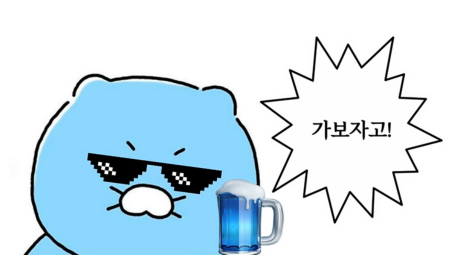

BGR의 형태로 잘 소환되었다.
  - RGB로 바꿔주면 됨

In [ ]:
real = []

for i in range(len(image_set)):
  image = cv2.cvtColor(image_set[i], cv2.COLOR_BGR2RGB)
  real.append(image)

show_image(real[1])

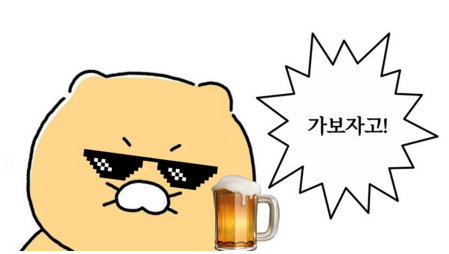

잘 변경되었다.

# 이미지 메타데이터 수집
- 여기서 한글은 인식이 되지 않아 폴더 명인 캐릭터 이름을 영어로 변경
  - 아마 한글 깨짐 방지(과거에 수업시간에 배움) 조치를 했으면 바꾸지 않았어도?


In [ ]:
import os

image_paths = [] # 파일 경로
dataset_gubuns = [] # 훈련인지 테스트인지
label_gubuns = [] # 프렌즈 캐릭터 8종

for dirname, _, filenames in os.walk("/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data"):
  for filename in filenames:
    file_path = os.path.join(dirname, filename)
    if ".jpg" in file_path:
      image_paths.append(file_path)

      # train/test 여부 판단
      if "train" in file_path:
        dataset_gubuns.append("train")
      elif "test" in file_path:
        dataset_gubuns.append("test")
      else:
        dataset_gubuns.append("na")

      # 클래스지정
      if "neo" in file_path: # 네오
        label_gubuns.append("neo")

      elif "lion" in file_path: # 라이언
        label_gubuns.append("lion")

      elif "muzi" in file_path: # 무지
        label_gubuns.append("muzi")

      elif "peach" in file_path: # 어피치
        label_gubuns.append("peach")

      elif "jj" in file_path: # 제이지
        label_gubuns.append("jj")

      elif "chun" in file_path: # 춘식이
        label_gubuns.append("chun")

      elif "tube" in file_path: # 튜브
        label_gubuns.append("tube")

      elif "frodo" in file_path: # 프로도
        label_gubuns.append("frodo")

      else: # 이도 저도 아닌경우
        label_gubuns.append("na")

# 잘 됐나 확인

In [ ]:
image_paths[:5], dataset_gubuns[:5], label_gubuns[:5]

(['/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 7번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 16번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 18번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 23번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 31번째.jpg'],
 ['test', 'test', 'test', 'test', 'test'],
 ['neo', 'neo', 'neo', 'neo', 'neo'])

In [ ]:
image_paths = image_paths[2:]
dataset_gubuns =  dataset_gubuns[2:]
label_gubuns = label_gubuns[2:]

image_paths[:5], dataset_gubuns[:5], label_gubuns[:5]

(['/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 18번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 23번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 31번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 48번째.jpg',
  '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 53번째.jpg'],
 ['test', 'test', 'test', 'test', 'test'],
 ['neo', 'neo', 'neo', 'neo', 'neo'])

In [ ]:
len(image_paths),len(dataset_gubuns),len(label_gubuns)

(1011, 1011, 1011)

# 수집한 메타데이터를 DataFrame으로 확인

In [ ]:
import pandas as pd

pd.set_option("display.max_colwidth", 200)

df_meta = pd.DataFrame({
    "path": image_paths,
    "dataset": dataset_gubuns,
    "label": label_gubuns
})

df_meta

,path,dataset,label
0,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 18번째.jpg,test,neo
1,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 23번째.jpg,test,neo
2,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 31번째.jpg,test,neo
3,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 48번째.jpg,test,neo
4,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 53번째.jpg,test,neo
...,...,...,...
1006,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/train/frodo_train/4 페이지 30번째.jpg,train,frodo
1007,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/train/frodo_train/1 페이지 32번째.jpg,train,frodo
1008,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/train/frodo_train/2 페이지 60번째.jpg,train,frodo
1009,/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/train/frodo_train/2 페이지 61번째.jpg,train,frodo


In [ ]:
len(image_paths), len(dataset_gubuns), len(label_gubuns)

(1011, 1011, 1011)

In [ ]:
df_meta['dataset'].value_counts()

train    902
test     109
Name: dataset, dtype: int64

In [ ]:
df_meta['label'].value_counts()

lion     228
chun     190
peach    137
tube      96
muzi      94
jj        90
frodo     89
neo       87
Name: label, dtype: int64

# 이미지 시각화
- 받은 파일에 문제가 없는지 확인 겸

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_images(image_paths, ncols=6, title=None):
  figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)

  for i in range(ncols):
    image = cv2.imread(image_paths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].set_title(title)

    
neo_image_list = df_meta[ df_meta['label'] == "neo" ]['path'].iloc[:6].tolist()
lion_image_list = df_meta[ df_meta['label'] == 'lion' ]['path'].iloc[:6].tolist()
muzi_image_list = df_meta[ df_meta['label'] == 'muzi' ]['path'].iloc[:6].tolist()
peach_image_list = df_meta[ df_meta['label'] == 'peach' ]['path'].iloc[:6].tolist()
jj_image_list = df_meta[ df_meta['label'] == 'jj' ]['path'].iloc[:6].tolist()
chun_image_list = df_meta[ df_meta['label'] == 'chun' ]['path'].iloc[:6].tolist()
tube_image_list = df_meta[ df_meta['label'] == 'tube' ]['path'].iloc[:6].tolist()
frodo_image_list = df_meta[ df_meta['label'] == 'frodo' ]['path'].iloc[:6].tolist()

print(neo_image_list)
print(lion_image_list)
print(muzi_image_list)
print(peach_image_list)
print(jj_image_list)
print(chun_image_list)
print(tube_image_list)
print(frodo_image_list)

['/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 59번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 37번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 58번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 21번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 35번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/neo_test/6 페이지 64번째.jpg']
['/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/lion_test/6 페이지 32번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/lion_test/6 페이지 22번째.jpg', '/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/test/lion_test/6 페이지 74번째.jpg', '/con

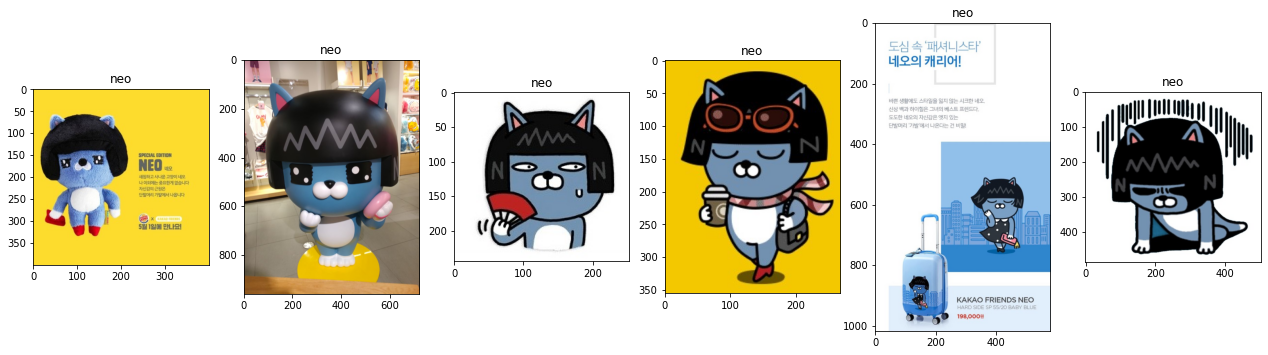

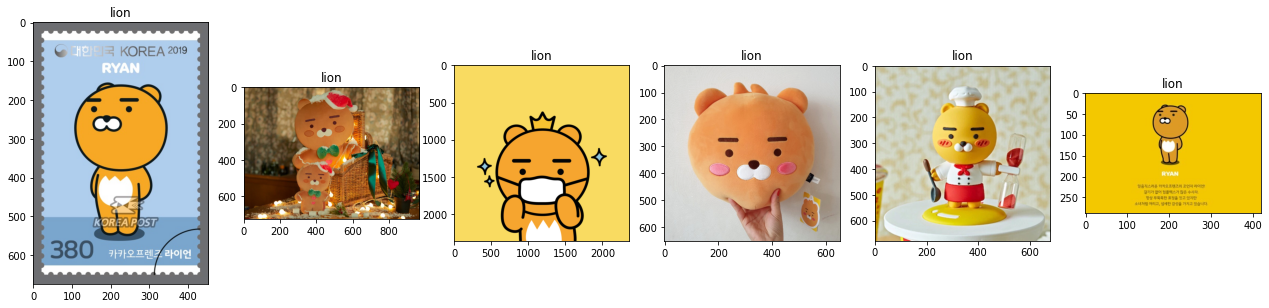

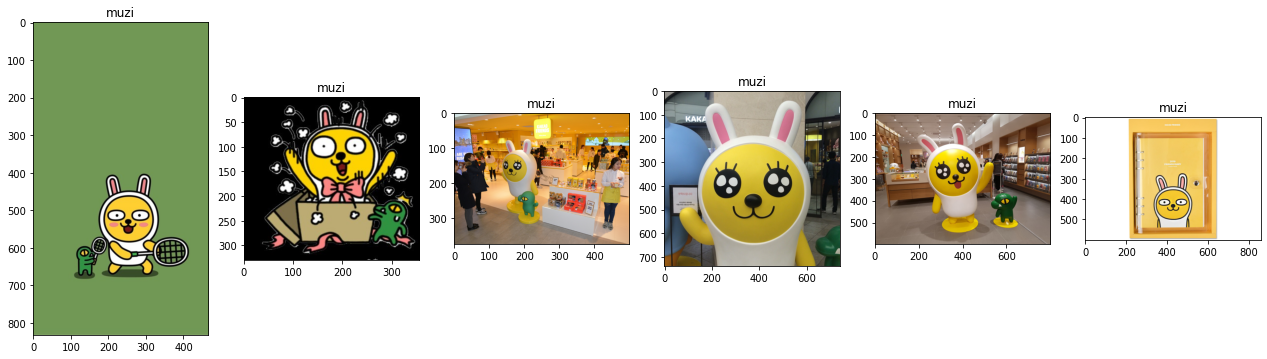

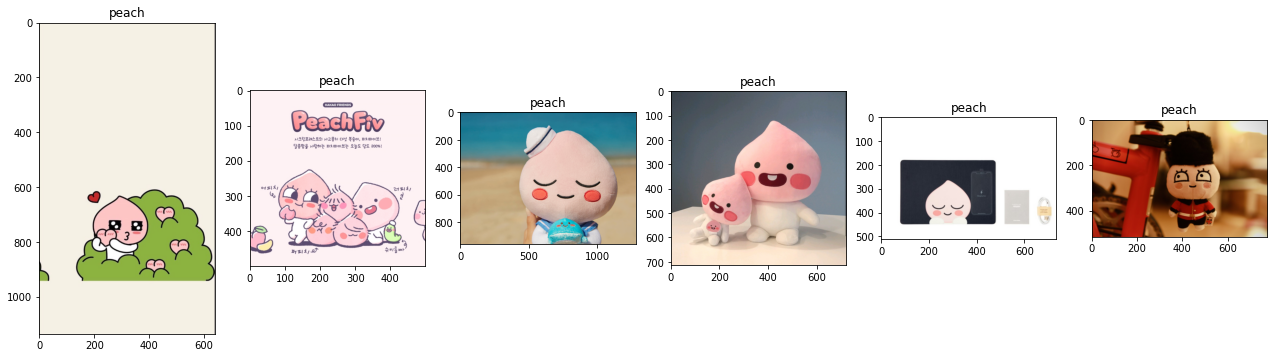

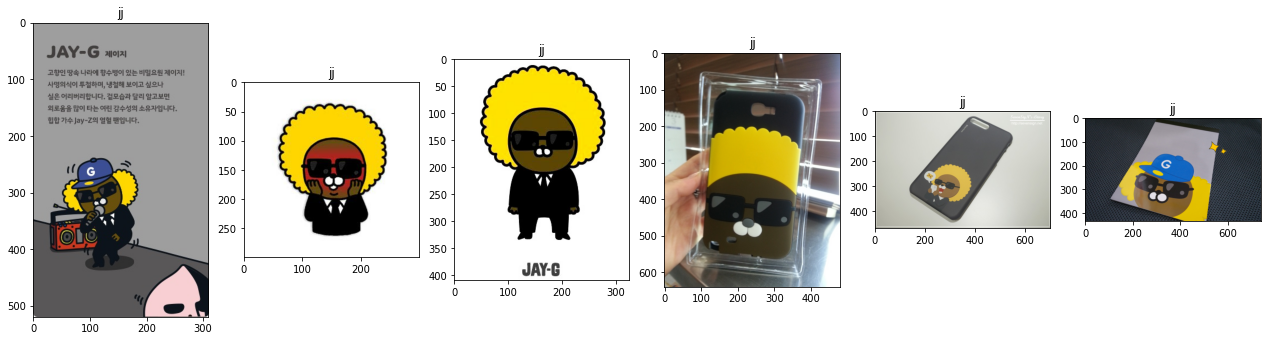

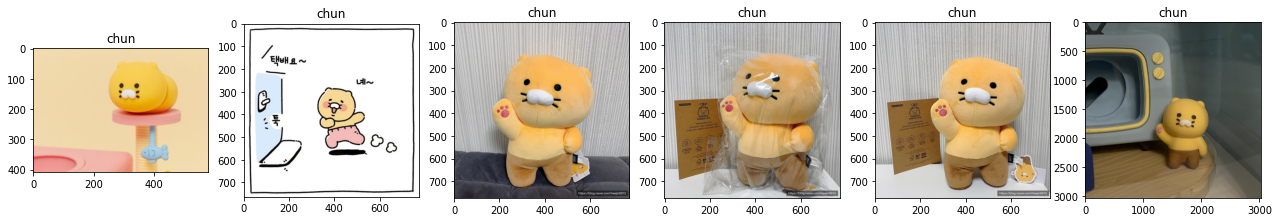

Error in callback <function flush_figures at 0x7f4a46aad050> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
show_images(neo_image_list, 6, title="neo")
show_images(lion_image_list, 6, title="lion")
show_images(muzi_image_list, 6, title="muzi")
show_images(peach_image_list, 6, title="peach")
show_images(jj_image_list, 6, title="jj")
show_images(chun_image_list, 6, title="chun")
show_images(tube_image_list, 6, title="tube")
show_images(frodo_image_list, 6, title="frodo")

# train 을 train, valid로 쪼개기

In [ ]:
df_train = df_meta[df_meta['dataset']=='train']
df_test = df_meta[df_meta['dataset']=='test']

In [ ]:
df_train.shape, df_test.shape

((902, 3), (109, 3))

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(
    df_train,
    test_size=0.15,
    stratify=df_train['label'], # y비율에 맞춰 뽑기
    random_state=42
)

In [ ]:
df_train.shape, df_valid.shape

((766, 3), (136, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=45,

    rescale = 1 / 255.0
)

train_flow_gen = train_gen.flow_from_dataframe(
    dataframe=df_train, 
    x_col = 'path', 
    y_col='label', 
    
    target_size=(224,224),
    class_mode='categorical',
    batch_size=16,
    shuffle=True

)

next(train_flow_gen)[0].shape

Found 766 validated image filenames belonging to 8 classes.


(16, 224, 224, 3)

# valid, test
- 확인 용이기 때문에 증강 X

In [ ]:
valid_gen = ImageDataGenerator(
    rescale = 1 / 255.0 # rescale만해주기
)

test_gen = ImageDataGenerator(
    rescale = 1 / 255.0 # rescale만해주기
)



valid_flow_gen = valid_gen.flow_from_dataframe(
    dataframe=df_valid,
    x_col = 'path',
    y_col = 'label',
    target_size=(224,224),
    class_mode = 'categorical',
    batch_size=16,

    shuffle=False
)

test_flow_gen = test_gen.flow_from_dataframe(
    dataframe=df_test,
    x_col = 'path',
    y_col = 'label',
    target_size=(224,224),
    class_mode = 'categorical',
    batch_size=16,

    shuffle=False
)

Found 136 validated image filenames belonging to 8 classes.
Found 109 validated image filenames belonging to 8 classes.


# 직접 구현했던 모델에 넣어보기
- 과거에 구현했던 모델 中 가져옴

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(filters=32, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=32, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=256, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=256, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2),


    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),

    # 출력층
    Dense(8, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
model.fit(
    train_flow_gen,
    validation_data= valid_flow_gen,
    epochs=6
)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_flow_gen)

5/5 [==============================] - 2s 378ms/step - loss: 2.0711 - acc: 0.1756


[2.071119546890259, 0.17557251453399658]

아무모델이나 해봤더니 정확도가 처참하다.

# 전이학습

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense

from tensorflow.keras.applications import ResNet50V2 # 레지넷

In [ ]:
input = Input(shape=(224,224,3))


# 이미 훈련이 완료된 모델 가져오기
base_model = ResNet50V2(input_tensor=input, include_top=False, weights = 'imagenet') 


bm_output = base_model.output
# (7,7,2048)


# 커스터마이징(downstream task수행)
x = GlobalAveragePooling2D()(bm_output)
x = Dense(128, activation='relu', kernel_regularizer="l2")(x)
x = Dense(64, activation='relu', kernel_regularizer="l2")(x)
x = Dense(32, activation='relu', kernel_regularizer="l2")(x)

# 출력층이전에는 뉴런이 많이 없는 것이 좋음.
output = Dense(8, activation='softmax')(x)

model = Model(inputs=input, outputs= output)
model.summary()

94668760/94668760 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.fit(
    train_flow_gen,
    validation_data=valid_flow_gen,
    epochs=10)

Epoch 1/10
 6/48 [==>...........................] - ETA: 7:11 - loss: 5.5225 - acc: 0.2708

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_flow_gen)
# 오차, 정확도 순서

5/5 [==============================] - 1s 251ms/step - loss: 3.2406 - acc: 0.6260


[3.240560531616211, 0.6259542107582092]

그래도 잠시나마 가르쳤다고 비약적으로 상승했다.

# 초기 목적인 특정 인물/캐릭터를 넣어서 검증

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/project_data/train/peach_train/3 페이지 70번째.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image.shape

(600, 900, 3)

(H, W, C)가 안맞다.
  - resize

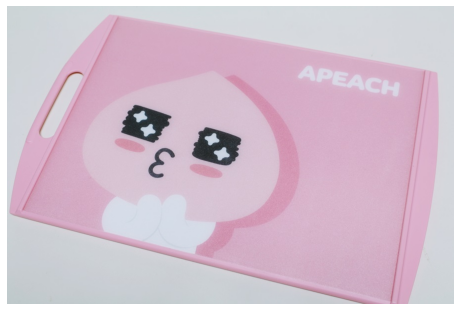

In [ ]:
def show_image(image):
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.axis('off')
  plt.show()

show_image(image)

In [ ]:
image_resized = cv2.resize(image, (224, 224))
image_resized.shape

(224, 224, 3)

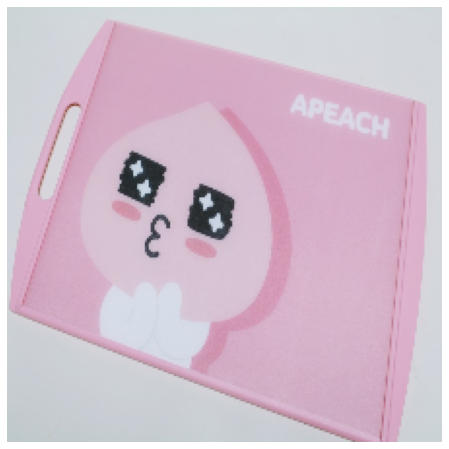

In [ ]:
show_image(image_resized)

In [ ]:
import numpy as np

result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)

image_batch = image_resized[np.newaxis, ...] # (H, W, C)형식이었으니까 배치정보 추가해주기
image_batch.shape

(1, 224, 224, 3)

In [ ]:
result_gen.fit(image_batch)

In [ ]:
result_generator_iterator = result_gen.flow(image_batch)

In [ ]:
aug_image_batch = next(result_generator_iterator)
aug_image_batch.shape

# 증강 : next() // 기억할 겸 해서 증강 -> flow() 아니고 next()

(1, 224, 224, 3)

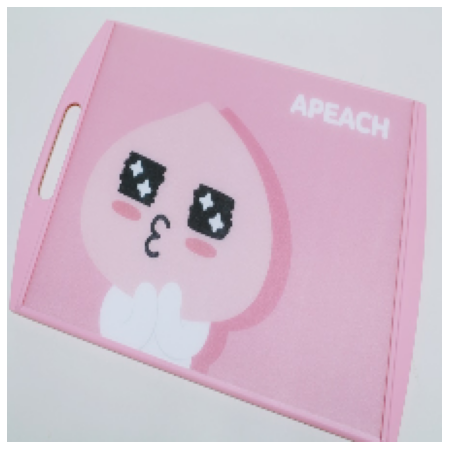

In [ ]:
show_image(aug_image_batch.squeeze())

In [ ]:
result = model.predict(aug_image_batch)
result

1/1 [==============================] - 0s 21ms/step


array([[5.8231025e-15, 3.5397808e-15, 7.7983220e-09, 7.6108946e-12,
        2.8790044e-17, 1.1426875e-11, 1.0000000e+00, 1.3455324e-10]],
      dtype=float32)

이렇게 봐서는 한 눈에 몇 번(어느 캐릭터) 인지 곤란하다.

In [ ]:
result.argmax()

6

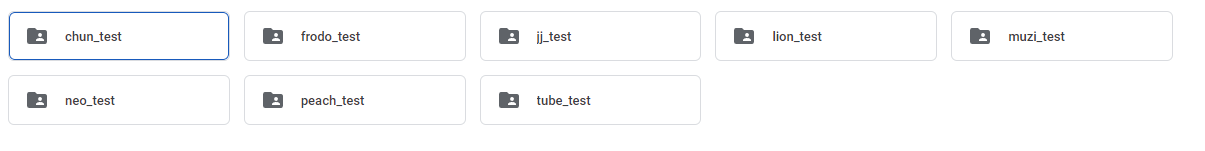

In [ ]:
train_flow_gen.class_indices

{'chun': 0,
 'frodo': 1,
 'jj': 2,
 'lion': 3,
 'muzi': 4,
 'neo': 5,
 'peach': 6,
 'tube': 7}

0번 : 춘식이

1번 : 프로도

2번 : 제이지

3번 : 라이언

4번 :  무지

5번 : 네오

6번 : 어피치

7번 : 튜브

어피치가 잘 나왔다.
- 계속 검증을 위해 다른 캐릭터로 재개

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/실험용/제이지실험용.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image.shape

(550, 550, 3)

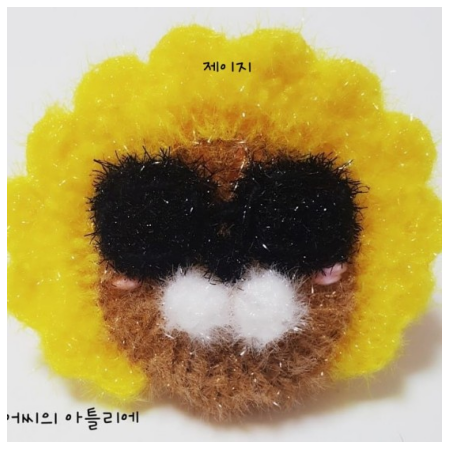

In [ ]:
show_image(image)

이건 틀리면 파장이 클 것 같다.

In [ ]:
image_resized = cv2.resize(image, (224, 224))
image_resized.shape

(224, 224, 3)

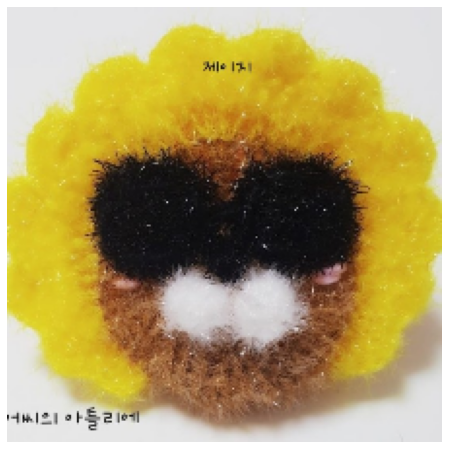

In [ ]:
show_image(image_resized)

In [ ]:
result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)


image_batch = image_resized[np.newaxis, ...] # (H, W, C)형식이었으니까 배치정보 추가해주기
image_batch.shape

(1, 224, 224, 3)

In [ ]:
result_gen.fit(image_batch)

In [ ]:
result_generator_iterator = result_gen.flow(image_batch)

In [ ]:
aug_image_batch = next(result_generator_iterator)
aug_image_batch.shape

# 증강된거

(1, 224, 224, 3)

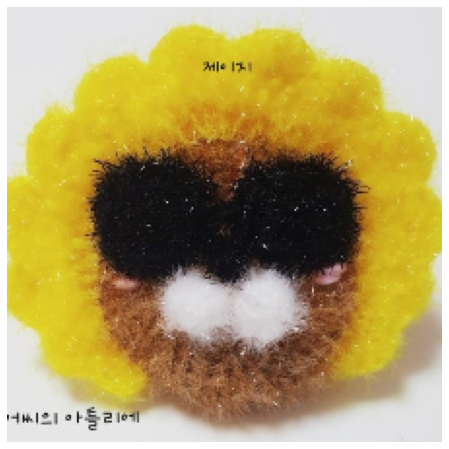

In [ ]:
show_image(aug_image_batch.squeeze())

In [ ]:
result = model.predict(aug_image_batch)
result

1/1 [==============================] - 1s 777ms/step


array([[7.4724873e-08, 5.3230662e-05, 9.9198103e-01, 9.1072434e-07,
        1.0748336e-06, 6.1539807e-03, 7.4547502e-06, 1.8021950e-03]],
      dtype=float32)

In [ ]:
result.argmax()

2

0번 : 춘식이

1번 : 프로도

2번 : 제이지

3번 : 라이언

4번 :  무지

5번 : 네오

6번 : 어피치

7번 : 튜브

다행히 카카오로부터 내용증명은 안 받을 것 같다.

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/실험용/박은빈.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image_resized = cv2.resize(image, (224, 224))


result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)


image_batch = image_resized[np.newaxis, ...] 


result_gen.fit(image_batch)
result_generator_iterator = result_gen.flow(image_batch)
aug_image_batch = next(result_generator_iterator)

# 증강된거


result = model.predict(aug_image_batch)


print(result, result.argmax())

1/1 [==============================] - 0s 87ms/step
[[7.9991506e-11 9.2384939e-10 3.3459819e-05 2.6846772e-07 2.2559402e-12
  4.9659880e-06 9.9992657e-01 3.4705285e-05]] 6


배우 '박은빈' 님으로 test한 결과 어피치가 나왔다.
- 조원 만장일치로 수긍

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/실험용/강신일.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image_resized = cv2.resize(image, (224, 224))


result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)


image_batch = image_resized[np.newaxis, ...] 


result_gen.fit(image_batch)
result_generator_iterator = result_gen.flow(image_batch)
aug_image_batch = next(result_generator_iterator)

# 증강된거


result = model.predict(aug_image_batch)


print(result, result.argmax())

1/1 [==============================] - 0s 45ms/step
[[7.5299657e-13 5.4074883e-12 9.3657275e-07 2.4661182e-09 1.0486464e-14
  1.8996523e-08 9.9999905e-01 4.3364047e-08]] 6


배우 '강신일' 님으로 테스트 했더니 어피치가 나왔다.
- ?????

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/실험용/재용님.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image_resized = cv2.resize(image, (224, 224))


result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)


image_batch = image_resized[np.newaxis, ...] 


result_gen.fit(image_batch)
result_generator_iterator = result_gen.flow(image_batch)
aug_image_batch = next(result_generator_iterator)

# 증강된거


result = model.predict(aug_image_batch)


print(result, result.argmax(), result.max())

1/1 [==============================] - 0s 21ms/step
[[2.7811030e-12 1.7482749e-12 1.7209024e-07 4.3655987e-10 2.9184510e-14
  1.3473461e-09 9.9999988e-01 5.8028631e-09]] 6 0.9999999


조원인 '최재용' 수강생이 용기를 내어 사진을 제출한 결과 어피치가 나왔다.
- ????????

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/스크래이핑/실험용/네오로둔갑한 최재용군.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image_resized = cv2.resize(image, (224, 224))


result_gen = ImageDataGenerator(
    rescale = 1 / 255.0
)


image_batch = image_resized[np.newaxis, ...] 


result_gen.fit(image_batch)
result_generator_iterator = result_gen.flow(image_batch)
aug_image_batch = next(result_generator_iterator)

# 증강된거


result = model.predict(aug_image_batch)


print(result, result.argmax(), result.max())

1/1 [==============================] - 0s 24ms/step
[[4.9700094e-07 9.7987913e-06 4.7142565e-04 1.0990105e-04 6.4469084e-08
  1.3065225e-02 9.8585248e-01 4.9069710e-04]] 6 0.9858525


결과를 인정할 수 없어 얼굴에 네오 얼굴을 얹었더니 어피치가 나왔다.
- ?????????????????????

# why...
  - 다른 방식으로 도전
    - ResNet -> VGG

In [ ]:
from tensorflow.keras.applications import VGG19

input = Input(shape=(224,224,3))


base_model = VGG19(input_tensor=input, include_top=False ) 
bm_output = base_model.output



# 커스터마이징(downstream task수행)
x = GlobalAveragePooling2D()(bm_output)
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
Dropout(0.3)
x = Dense(256, activation='relu', kernel_initializer='he_normal')(x)
Dropout(0.3)

output = Dense(8, activation='softmax')(x)

model = Model(inputs=input, outputs= output)
model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.fit(
    train_flow_gen,
    validation_data=valid_flow_gen,
    epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


18/23 [======================>.......] - ETA: 3s - loss: 4.3265 - acc: 0.1836

UnknownError: ignored

모델이 화가 단단히 났다.
  - 오류가 나기전에는 강사님과 함께 loss값을 보고 눈앞이 아득해졌다.

# 끝나고 나서 뒤돌아봄
1. 코딩에서 문제가 있었는지 캐릭터를 특정하지 못하면 어피치라고 주장하는 것으로 추정
  - 코드 검토 필요

2. 특강에서 배웠던 github 등을 사용하지 않아서 서로 간 의사소통에 혼란

3. 분명히 수업시간에 배운 내용들인데 머릿 속에서 꺼내오기가 쉽지 않음
  - 이건 아마도 (실전) 경험 부족 때문...

4. GPU 모델 사용 간에 불편함이 다소 있음
  - 편리함 = $

# 강사님 / FT님 조언 사항

- batch size는 $2^n$이 적합
- Model의 출력층 이전에는 Dense가 작은 것이 좋음

- 현재 모델은 여러 이유로 과적합임
  - 가장 큰 이유 : 사진의 수량 매우 부족
  - Dense 당 100장으로 도전한 과감함...

- 복사 붙여넣기로는 실력이라는 것이 생길 수 없다.
  - Why?를 달고 살 것
  - 망해도 좋으니 직접 해봐야 한다.
  - 복붙은 자기가 모든 것을 알고 있을 때 해도 위험하다.